In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline

In [2]:
cereal = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/cereal.csv")

In [3]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


# 1
Plot (using plotnine/ggplot) the protein, fat, sodium, calories, fiber, potassium and sugars What patterns do you notice?

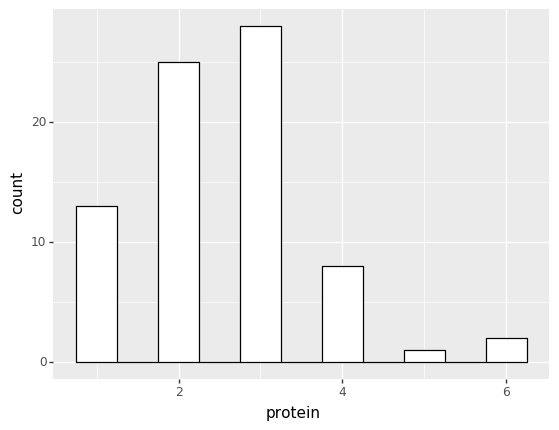

<ggplot: (30518813)>

In [4]:
(ggplot(cereal, aes("protein")) + geom_histogram(fill = "white", color = "black"))

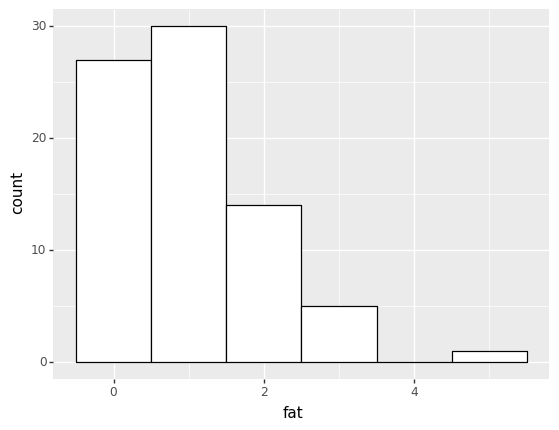

<ggplot: (17066581)>

In [5]:
(ggplot(cereal, aes("fat")) + geom_histogram(fill = "white", color = "black"))

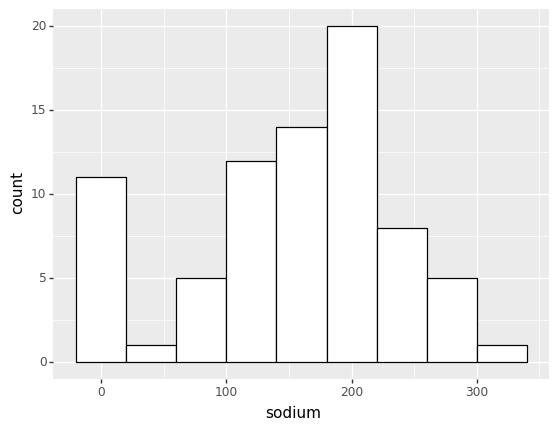

<ggplot: (17249589)>

In [6]:
(ggplot(cereal, aes("sodium")) + geom_histogram(fill = "white", color = "black"))

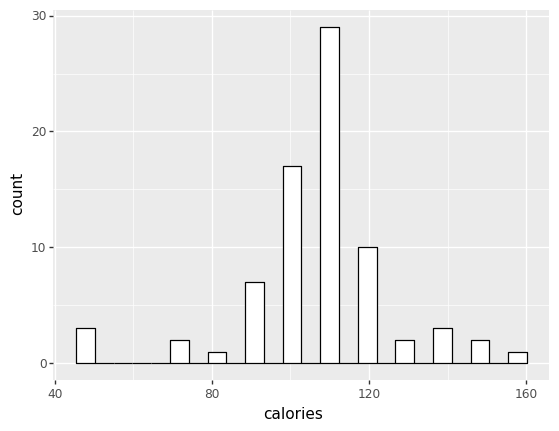

<ggplot: (5668421)>

In [7]:
(ggplot(cereal, aes("calories")) + geom_histogram(fill = "white", color = "black"))

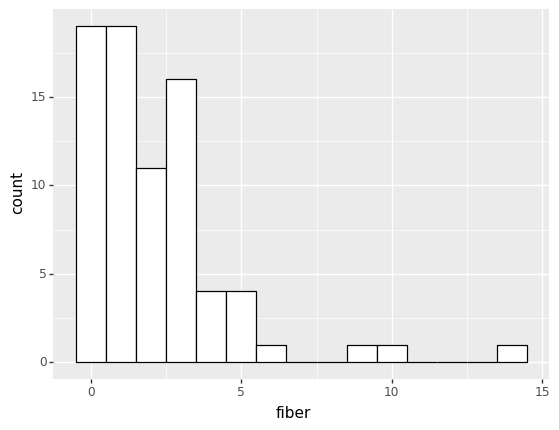

<ggplot: (17050513)>

In [8]:
(ggplot(cereal, aes("fiber")) + geom_histogram(fill = "white", color = "black"))

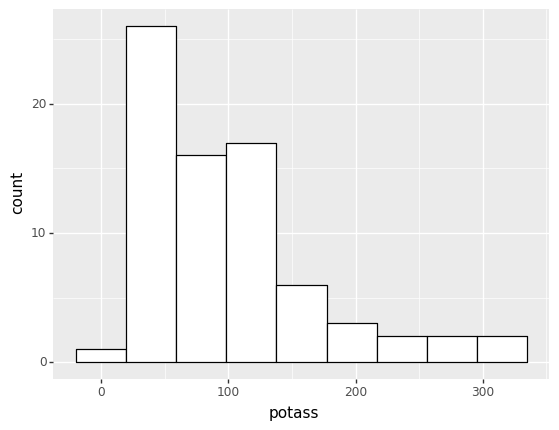

<ggplot: (17332769)>

In [9]:
(ggplot(cereal, aes("potass")) + geom_histogram(fill = "white", color = "black"))

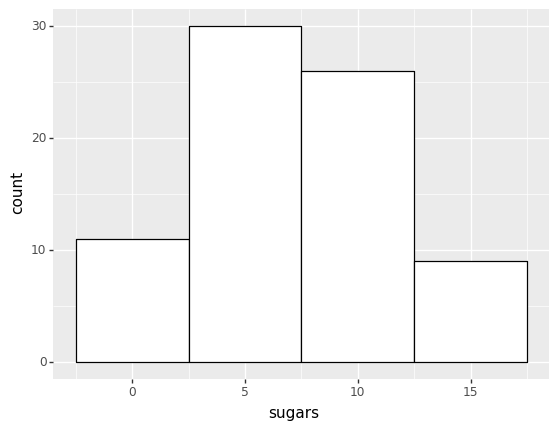

<ggplot: (17347443)>

In [10]:
(ggplot(cereal, aes("sugars")) + geom_histogram(fill = "white", color = "black"))

## Interesting Patterns
The distribution of fiber is very skewed, there are just a few cereals that have EXTREMELY high fiber content...The calories are pretty steady, with almost all cereals having a caloric count between 90-120 cals.

Can you predict the amount of sugars (in grams) in a cereal based on sodium, fat, and protein? Interpret the results in the text box below.

In [11]:
# Fill the code in

model = smf.ols(formula = "sugars ~ sodium + fat + protein ", data = cereal)
output = model.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sugars   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     6.767
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           0.000439
Time:                        21:05:02   Log-Likelihood:                -210.13
No. Observations:                  76   AIC:                             428.3
Df Residuals:                      72   BIC:                             437.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7019      1.489      5.844      0.000       5.734      11.670
sodium         0.0028      0.006      0.502      0.617      -0.008       0.014
fat            1.6041      0.461      3.480      0.001       0.685       2.523
protein       -1.4841      0.436     -3.406      0.001      -2.353      -0.615
==============================================================================
Omnibus:                        3.522   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.957
Skew:                           0.374   Prob(JB):                        0.228
Kurtosis:                       2.389   Cond. No.                         609.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results


# 2
Use the StandardScaler() from sklearn to z-score (or standardize) your continuous variables. Re-run your model

In [13]:
from sklearn.preprocessing import StandardScaler #Z-score variables

# Scale Variables Here
zscore = StandardScaler()
zscore.fit(cereal[["sodium", "fat", "protein"]])
Xz = zscore.transform(cereal[["sodium", "fat", "protein"]])

cereal[["sodium", "fat", "protein"]] = Xz

# Run model here
model = smf.ols(formula = "sugars ~ sodium + fat + protein ", data = cereal)
output = model.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sugars   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     6.767
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           0.000439
Time:                        21:12:05   Log-Likelihood:                -210.13
No. Observations:                  76   AIC:                             428.3
Df Residuals:                      72   BIC:                             437.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9934      0.453     15.433      0.000       6.090       7.897
sodium         0.2317      0.461      0.502      0.617      -0.688       1.151
fat            1.6040      0.461      3.480      0.001       0.685       2.523
protein       -1.6142      0.474     -3.406      0.001      -2.559      -0.669
==============================================================================
Omnibus:                        3.522   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.957
Skew:                           0.374   Prob(JB):                        0.228
Kurtosis:                       2.389   Cond. No.                         1.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3
What other variables in the data set do you think are important? Run another model with those variables.

In [14]:
from sklearn.preprocessing import StandardScaler #Z-score variables

# Scale Variables Here
zscore = StandardScaler()
zscore.fit(cereal[["sodium", "fat", "protein", "carbo", "fiber"]])
Xz = zscore.transform(cereal[["sodium", "fat", "protein", "carbo", "fiber"]])

cereal[["sodium", "fat", "protein", "carbo", "fiber"]] = Xz

# Run model here
model = smf.ols(formula = "sugars ~ sodium + fat + protein + carbo + fiber ", data = cereal)
output = model.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sugars   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     10.68
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           1.20e-07
Time:                        21:16:42   Log-Likelihood:                -198.03
No. Observations:                  76   AIC:                             408.1
Df Residuals:                      70   BIC:                             422.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9800      0.392     17.807      0.000       6.198       7.762
sodium         0.9424      0.423      2.230      0.029       0.100       1.785
fat            0.7321      0.437      1.674      0.099      -0.140       1.604
protein       -0.9737      0.504     -1.934      0.057      -1.978       0.031
carbo         -2.5195      0.495     -5.091      0.000      -3.507      -1.532
fiber         -1.0203      0.521     -1.958      0.054      -2.060       0.019
==============================================================================
Omnibus:                        2.280   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.689
Skew:                           0.350   Prob(JB):                        0.430
Kurtosis:                       3.211   Cond. No.                         2.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""